# LAB 4.01

### Import the necessary libraries.

In [371]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [372]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

### First look at its main features (head, shape, info).

In [373]:
display(customer_df.shape)
display(customer_df.head())
display(customer_df.dtypes)
pd.set_option('display.max_columns', None)

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

### Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [374]:
cols = []
for x in customer_df.columns:
    cols.append(x.replace(' ', '_'))

customer_df.columns = cols
    
    
col = []
for x in customer_df.columns:
    col.append(x.lower())
customer_df.columns = col    
    
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Change effective to date column to datetime format.

In [375]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

### Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [376]:
# first I separate the numerical data so I can use it for my function
numericals = customer_df.select_dtypes(np.number)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [377]:
def con_de(df):
    discrete_lst = []
    continuous_lst = []

    for i in df.columns:
        if df[i].nunique() > 100:      # made the cut off at 100 because I wanted to include months of inception to discrete and it has 100 unique values. all other discrete data is less than 100
             continuous_lst.append(i)
        else:
            discrete_lst.append(i)
    
    continuous_df = df[continuous_lst]
    discrete_df = df[discrete_lst]
    
    return discrete_df, continuous_df


In [378]:
discrete_df, continuous_df = con_de(numericals)

In [379]:
discrete_df

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1
...,...,...,...,...
9129,18,89,0,2
9130,14,28,0,1
9131,9,37,3,2
9132,34,3,0,3


In [380]:
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879
...,...,...,...,...
9129,23405.987980,71941,73,198.234764
9130,3096.511217,21604,79,379.200000
9131,8163.890428,0,85,790.784983
9132,7524.442436,21941,96,691.200000


### Plot a correlation matrix, comment what you see.

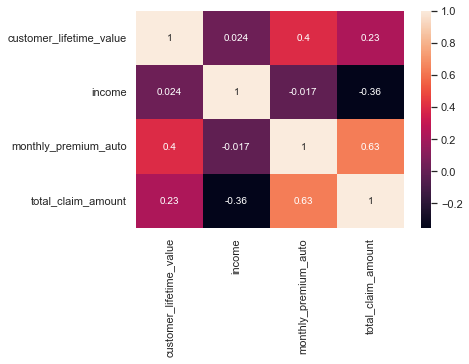

In [381]:
# continous data
correlation_matrix_cont = continuous_df.corr()
sns.heatmap(correlation_matrix_cont, annot=True)
plt.show()

# there is a clear correlation between 'monthly premium' & and 'total claim amount' it is not too hight though that i have to remove it.
# there is also a correlation between 'monthly premium' & 'customer lifetime value' but not as strong

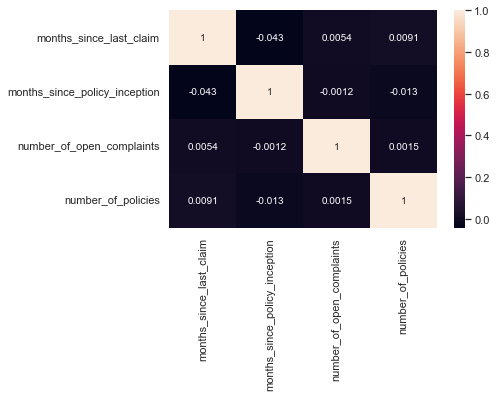

In [382]:
# discrete data
correlation_matrix_dis = discrete_df.corr()
sns.heatmap(correlation_matrix_dis, annot=True)
plt.show()

# there does not seem to be any correlation

### Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


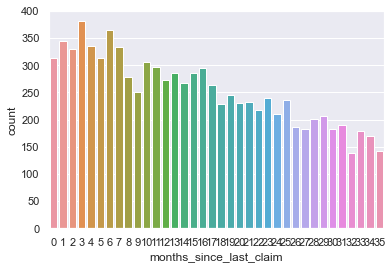

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


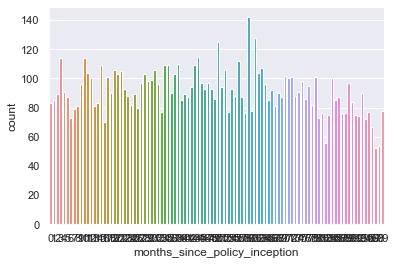

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


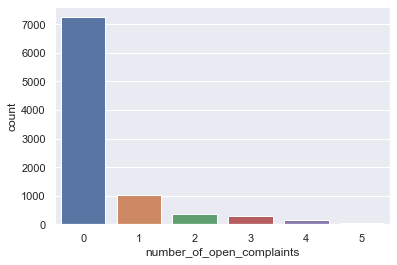

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


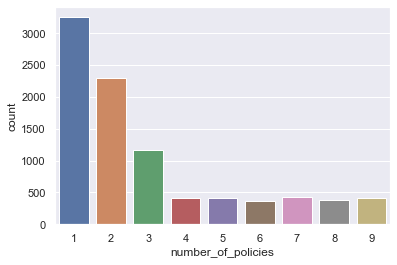

In [383]:
#discrete data
def plot_discrete(df):
    for x in df.columns:
        sns.countplot(df[x])
        plt.show()
    
plot_discrete(discrete_df)    

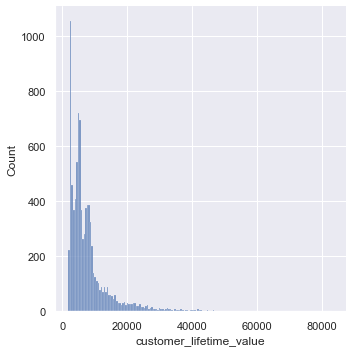

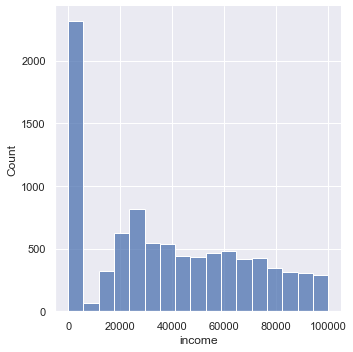

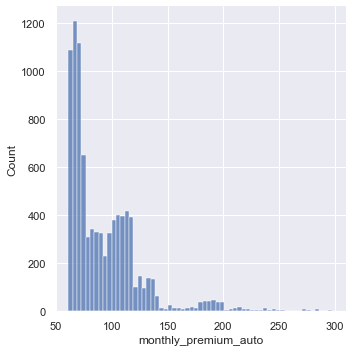

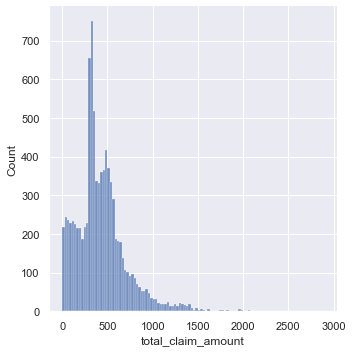

In [384]:
#continuous data
for x in continuous_df.columns:
    sns.displot(continuous_df[x])
    plt.show()

### Comment what you can see in the plots.

In [385]:
# discrete data:
# 'months since last claim' & 'months since inception' have many values and it's hard to see much from the graph
# it would probably be a good idea to bin the values


# continuous data:
# most plots are skewed to the left (expect income) with a few values to the left. Could be outliers

### Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

In [386]:
for x in continuous_df.columns:
    iqr = np.nanpercentile(continuous_df[x],75) - np.nanpercentile(continuous_df[x],25)
    upper_limit = np.nanpercentile(continuous_df[x],75) + 1.5*iqr
    print(x, 'upper limit is: ',upper_limit)
    extraordinary_points = continuous_df[continuous_df[x] > upper_limit]
    print(x, 'no. of rows: ', len(extraordinary_points))
    

# in addtion to box plots I wanted to see how many values are very hight above the upper limit

customer_lifetime_value upper limit is:  16414.039911750002
customer_lifetime_value no. of rows:  817
income upper limit is:  155800.0
income no. of rows:  0
monthly_premium_auto upper limit is:  170.5
monthly_premium_auto no. of rows:  430
total_claim_amount upper limit is:  960.3997301249999
total_claim_amount no. of rows:  453


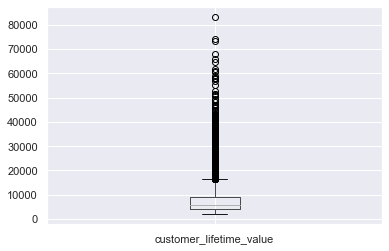

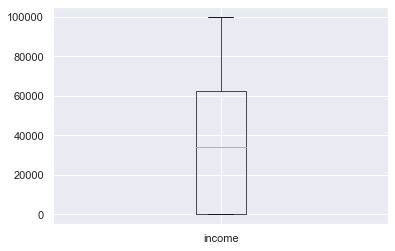

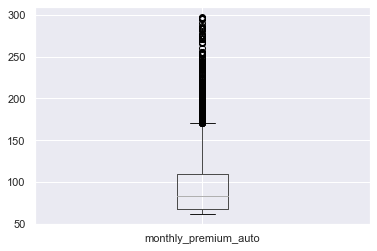

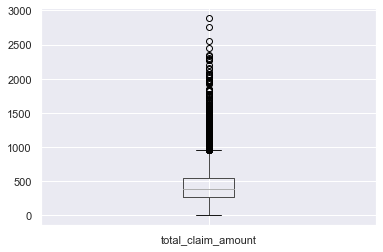

In [387]:
for x in continuous_df.columns:
    continuous_df[[x]].boxplot() 
    plt.show()

### Did you find outliers? Comment what you will do with them.

In [388]:
# I would not consider any value an outlier here. While some values are quite hight considering this is an insurance business 
# those values do not seem to be unreasonable


### Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [389]:
numericals.isna().sum().sum()

0

# Lab 4.02

### Find all of the categorical data. Save it in a categorical_df variable.

In [390]:
categorical_df = customer_df.select_dtypes(object)
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### Check for NaN values

In [391]:
categorical_df.isna().sum().sum()

0

### Check all unique values of columns

In [392]:
for col in categorical_df.columns:
    print(col,categorical_df[col].unique())

customer ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
state ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response ['No' 'Yes']
coverage ['Basic' 'Extended' 'Premium']
education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
employmentstatus ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender ['F' 'M']
location_code ['Suburban' 'Rural' 'Urban']
marital_status ['Married' 'Single' 'Divorced']
policy_type ['Corporate Auto' 'Personal Auto' 'Special Auto']
policy ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
renew_offer_type ['Offer1' 'Offer3' 'Offer2' 'Offer4']
sales_channel ['Agent' 'Call Center' 'Web' 'Branch']
vehicle_class ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
vehicle_size ['Medsize' 'Small' 'Large']


### Check dtypes. Do they all make sense as categorical data?

In [393]:
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [394]:
# I think they all make sense as cat data. At least I don't see why they wouldn't

### Does any column contain alpha and numeric data? Decide how to clean it.

In [395]:
# alphanumeric columns: customer, policy, renew_offer_type

# I would drop customer as it is not needed. 

### Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions

In [396]:
# right now, I wouldnt. But that will probably change as soon as i have to do something with the data

### Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [397]:
categorical_df[['policy', 'policy_type']]

,policy,policy_type
0,Corporate L3,Corporate Auto
1,Personal L3,Personal Auto
2,Personal L3,Personal Auto
3,Corporate L2,Corporate Auto
4,Personal L1,Personal Auto
...,...,...
9129,Personal L1,Personal Auto
9130,Corporate L3,Corporate Auto
9131,Corporate L2,Corporate Auto
9132,Personal L2,Personal Auto


In [398]:
categorical_df['policy'].value_counts(dropna=False)

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [399]:
categorical_df['policy_type'].value_counts(dropna=False)

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [400]:
# Policy Type is more general than Policy. Policy holds the same information (Personal, Corporate, Special) but has also 
# additional information within those groups (L3, L2, L1)
# I would therefore drop policy type

### Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [401]:
for col in categorical_df.columns:
    print(col, categorical_df[col].nunique())
    
# customer should be dropped. policy_type and policy can be combined.     

customer 9134
state 5
response 2
coverage 3
education 5
employmentstatus 5
gender 2
location_code 3
marital_status 3
policy_type 3
policy 9
renew_offer_type 4
sales_channel 4
vehicle_class 6
vehicle_size 3


# Lab 4.03

### Open the categoricals variable we created before.

In [402]:
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


### Plot all the categorical variables with the proper plot. What can you see?

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


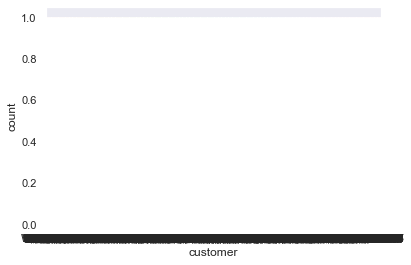

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


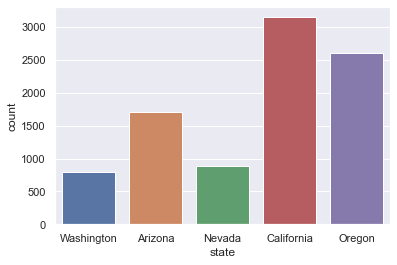

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


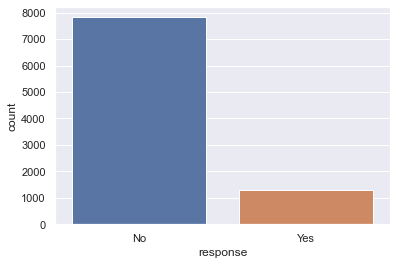

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


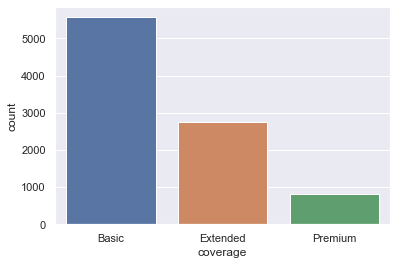

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


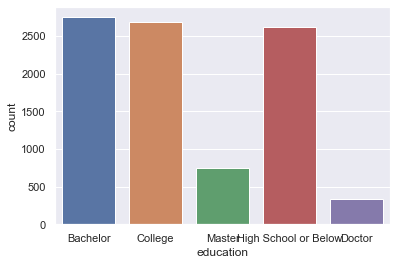

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


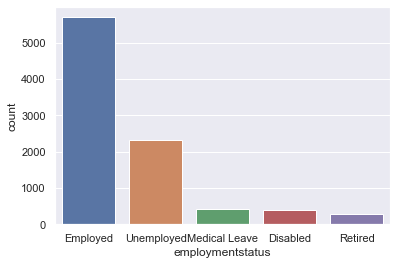

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


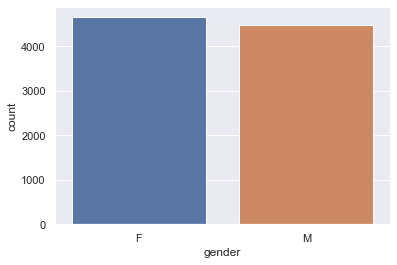

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


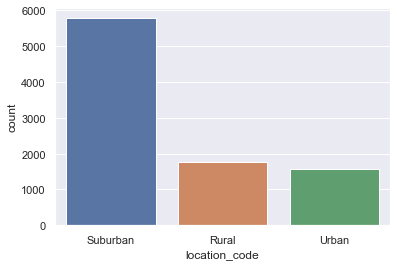

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


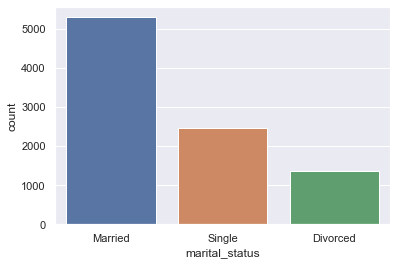

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


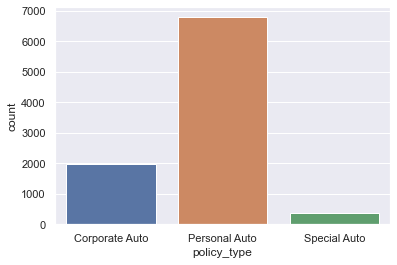

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


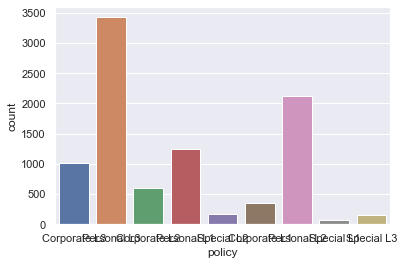

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


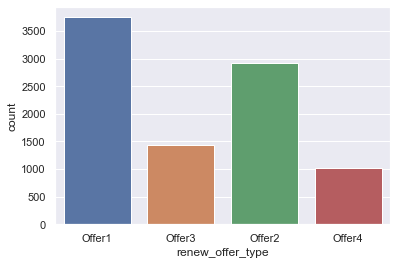

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


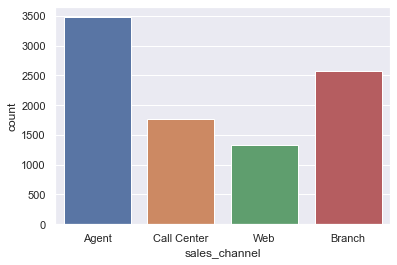

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


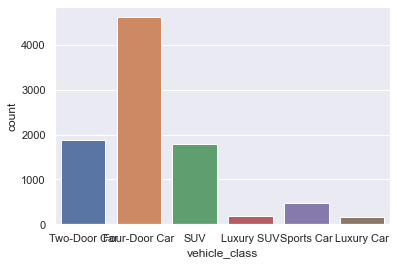

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


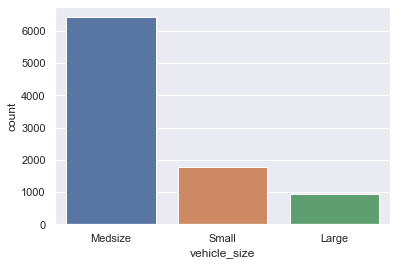

In [403]:
plot_discrete(categorical_df)

# customer column should be dropped
# some values can be combined as its very uneven distributed (like employmenst status)

### There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [404]:
categorical_df[['policy', 'policy_type']] # I would drop policy_type

,policy,policy_type
0,Corporate L3,Corporate Auto
1,Personal L3,Personal Auto
2,Personal L3,Personal Auto
3,Corporate L2,Corporate Auto
4,Personal L1,Personal Auto
...,...,...
9129,Personal L1,Personal Auto
9130,Corporate L3,Corporate Auto
9131,Corporate L2,Corporate Auto
9132,Personal L2,Personal Auto


In [405]:
categorical_df[['vehicle_class', 'vehicle_size']][0:50]
# i first thought I could drop one of those columns. I thought the vehicle_class would give information about the vehicle size
# but it seems not be be true so I will keep them

,vehicle_class,vehicle_size
0,Two-Door Car,Medsize
1,Four-Door Car,Medsize
2,Two-Door Car,Medsize
3,SUV,Medsize
4,Four-Door Car,Medsize
5,Two-Door Car,Medsize
6,Four-Door Car,Medsize
7,Four-Door Car,Medsize
8,Four-Door Car,Medsize
9,Four-Door Car,Medsize


### Plot time variable. Can you extract something from it?

<AxesSubplot:xlabel='effective_to_date', ylabel='total_claim_amount'>

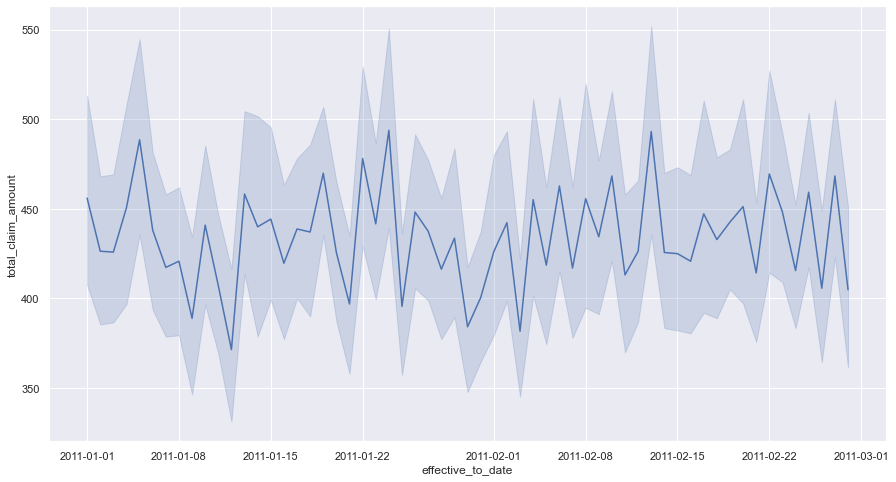

In [406]:
sns.set(rc={'figure.figsize':(15,8)})
sns.lineplot(x="effective_to_date", y="total_claim_amount", data = customer_df)


# Lab 4.05

### In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [407]:
from sklearn.model_selection import train_test_split

#I will do this step a bit later

### We will start with removing outliers, if you have not already done so. We have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [408]:
# I decided to keep the outliers. Below a function I could use to detect the outliers 

# def outliers(df):
#     for x in df.columns:
#         iqr = np.nanpercentile(df[x],75) - np.nanpercentile(df[x],25)
#         upper_limit = np.nanpercentile(df[x],75) + 1.5*iqr
#         extraordinary_points = df[df[x] > upper_limit]
#         return extraordinary_points
    
# outliers(continuous_df)    

### Create a copy of the dataframe for the data wrangling.

In [409]:
customer_copy = customer_df.copy

In [410]:
# I will ordinal encode at this step before moving on to the next question 
customer_df["coverage"] = customer_df["coverage"].map({"Basic" : 0, "Extended" :.5, "Premium" : 1})
customer_df["employmentstatus"] = customer_df["employmentstatus"].map({"Medical Leave" : 0, "Disabled" : 0, "Unemployed" : 0, "Retired" : .5, "Employed":1})
customer_df["location_code"] =customer_df["location_code"].map({"Rural" : 0, "Suburban" :.5, "Urban" : 1,})
customer_df["vehicle_size"] =customer_df["vehicle_size"].map({"Small" : 0, "Medsize" :.5, "Large" : 1,})
customer_df["education"] = customer_df["education"].map({"High School or Below" : 0, "College" :.5, "Bachelor" : .5,"Master": 1, "Doctor" : 1})

In [411]:
# I will also drop some columns before moving on
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [412]:
customer_df = customer_df.drop(['customer','policy_type'], axis=1)

### Normalize the continuous variables. You can use any one method you want.

In [413]:
# first i will do all neccessary splits
y = customer_df['total_claim_amount']
X = customer_df.drop(['total_claim_amount'], axis=1)

In [414]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,  columns=X.columns)

X_train_num = X_train_df.select_dtypes(include = np.number)
X_test_num  = X_test_df.select_dtypes(include = np.number)
X_train_cat = X_train_df.select_dtypes(include = np.object)
X_test_cat  = X_test_df.select_dtypes(include = np.object)

C:\Users\jasmi\AppData\Local\Temp\ipykernel_16496\3882879824.py:8: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_cat = X_train_df.select_dtypes(include = np.object)
C:\Users\jasmi\AppData\Local\Temp\ipykernel_16496\3882879824.py:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_cat  = X_test_df.select_dtypes(include = np.object)


In [415]:
# Now I can normalize my data
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_train_num) 
X_train_scaled_arr = transformer.transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=X_train_num.columns)


X_test_scaled_arr = transformer.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test_num.columns)

### Encode the categorical variables (See the hint below for encoding categorical data!!!)

In [416]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded_cat = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names(input_features=X_train_cat.columns)
onehot_encoded_train = pd.DataFrame(encoded_cat, columns=cols)


encoded_test_cat = encoder.transform(X_test_cat).toarray()
onehot_encoded_test = pd.DataFrame(encoded_test_cat, columns=cols)

C:\Users\jasmi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [417]:
# I will now concat my data frames
X_train_treated = pd.concat([X_train_scaled, onehot_encoded_train], axis=1)
X_test_treated = pd.concat([X_test_scaled, onehot_encoded_test], axis=1)

### The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [445]:
time_df = pd.DataFrame()
time_df["day"] = customer_df["effective_to_date"].dt.day
time_df["week"] = customer_df["effective_to_date"].dt.week
time_df["month"] = customer_df["effective_to_date"].dt.month
time_df["target"] = customer_df["total_claim_amount"]
time_df

C:\Users\jasmi\AppData\Local\Temp\ipykernel_16496\2980592915.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  time_df["week"] = customer_df["effective_to_date"].dt.week


,day,week,month,target
0,24,8,2,384.811147
1,31,5,1,1131.464935
2,19,7,2,566.472247
3,20,3,1,529.881344
4,3,5,2,138.130879
...,...,...,...,...
9129,10,6,2,198.234764
9130,12,6,2,379.200000
9131,6,5,2,790.784983
9132,3,5,2,691.200000


<AxesSubplot:xlabel='week', ylabel='target'>

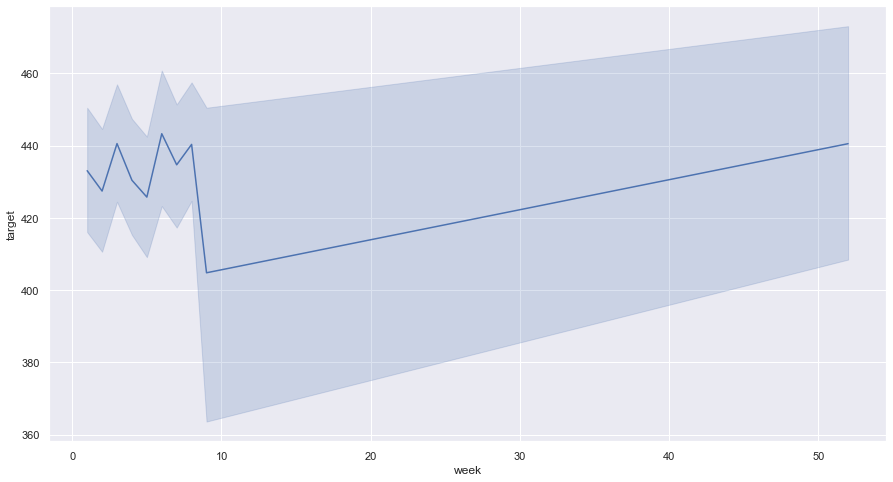

In [446]:
sns.lineplot(x = time_df.week, y = time_df.target)

In [ ]:
# I am not sure what do with the time variable

### Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [418]:
X_test_treated.dtypes

customer_lifetime_value          float64
coverage                         float64
education                        float64
employmentstatus                 float64
income                           float64
location_code                    float64
monthly_premium_auto             float64
months_since_last_claim          float64
months_since_policy_inception    float64
number_of_open_complaints        float64
number_of_policies               float64
vehicle_size                     float64
state_California                 float64
state_Nevada                     float64
state_Oregon                     float64
state_Washington                 float64
response_Yes                     float64
gender_M                         float64
marital_status_Married           float64
marital_status_Single            float64
policy_Corporate L2              float64
policy_Corporate L3              float64
policy_Personal L1               float64
policy_Personal L2               float64
policy_Personal 

### Try a simple linear regression with all the data to see whether we are getting good results.



In [419]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train_treated,y_train)

LinearRegression()

In [428]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

predictions = lm.predict(X_train_treated) 
print(r2_score(y_train, predictions))

predictions_test = lm.predict(X_test_treated) 
print(r2_score(y_test, predictions_test))

0.6313243066298144
0.6145713928929424


### Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [429]:
def models_automation(models, X_tr, y_tr,X_te, y_te):
    for model in models:
        model.fit(X_tr, y_tr)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_tr, y_tr)}, Test -> {model.score(X_te, y_te)}")

### Use the function to check LinearRegressor and KNeighborsRegressor.

In [440]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

model_lst = [LinearRegression(),KNeighborsRegressor(), MLPRegressor()]
models_automation(model_lst, X_train_treated, y_train, X_test_treated, y_test )

LinearRegression: Train -> 0.6313243066298144, Test -> 0.6145713928929424
KNeighborsRegressor: Train -> 0.6241371362736133, Test -> 0.4207961739228616
MLPRegressor: Train -> 0.7302902795581359, Test -> 0.7199243930524228


C:\Users\jasmi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### You can check also the MLPRegressor for this task!

In [ ]:
# I did the MLP Regressor in the previous questions

### Check and discuss the results.

In [ ]:
# The MLP regressor gives the best results. followed by the linear regression model

# Lab 4.06

### Get the numerical variables from our dataset.

In [441]:
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


### Check using a distribution plot if the variables fit the theoretical normal or exponential distribution

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


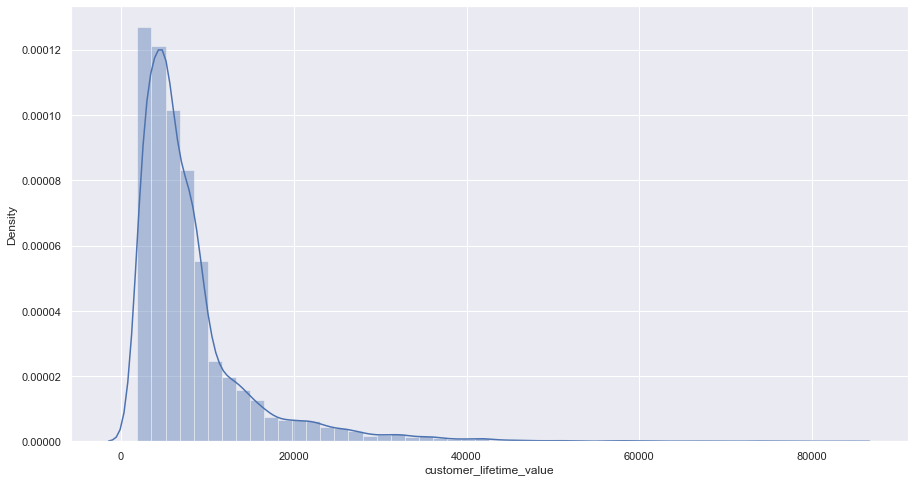

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


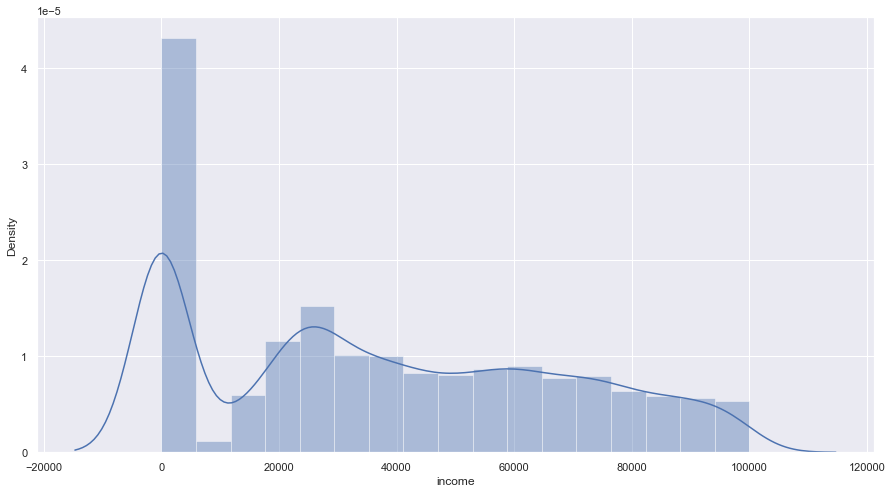

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


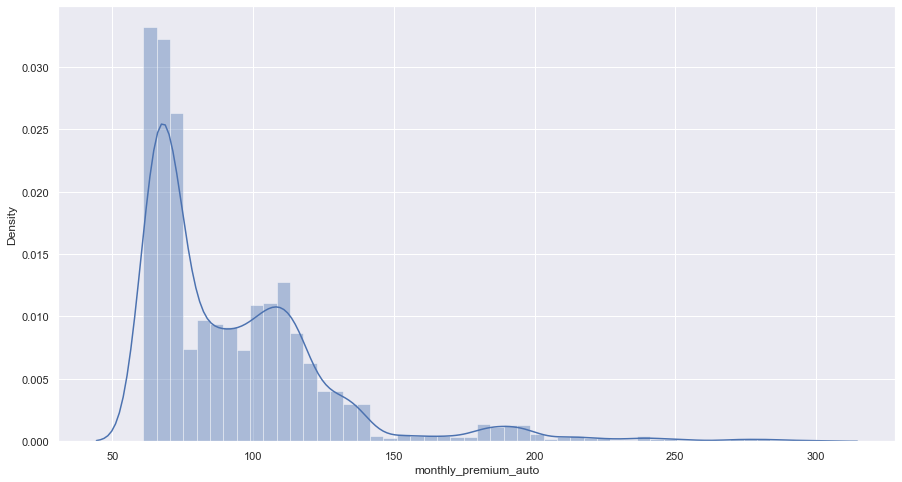

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


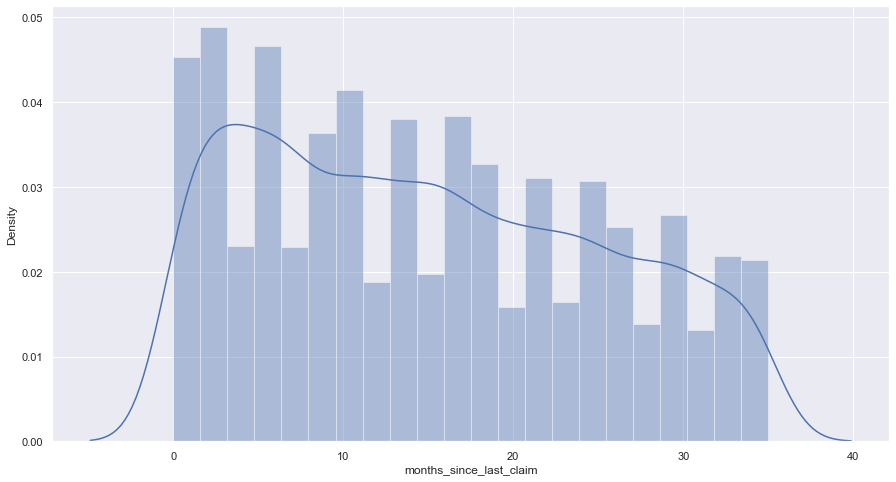

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


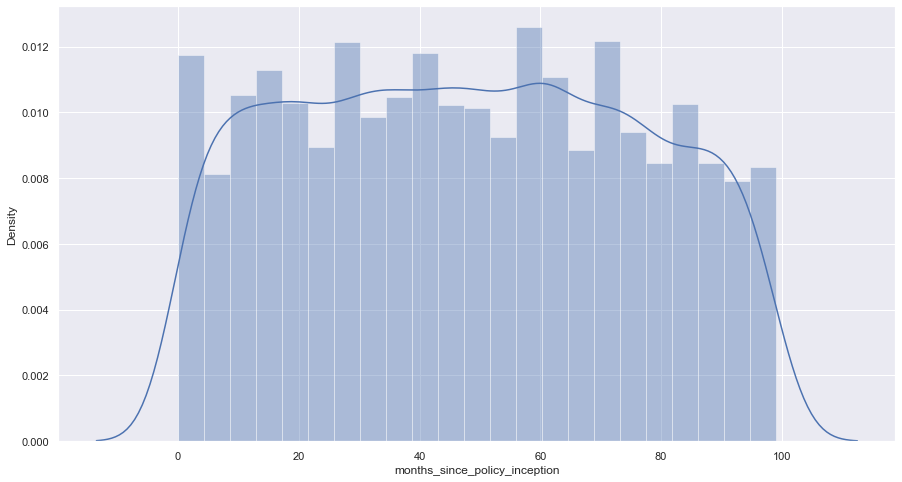

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


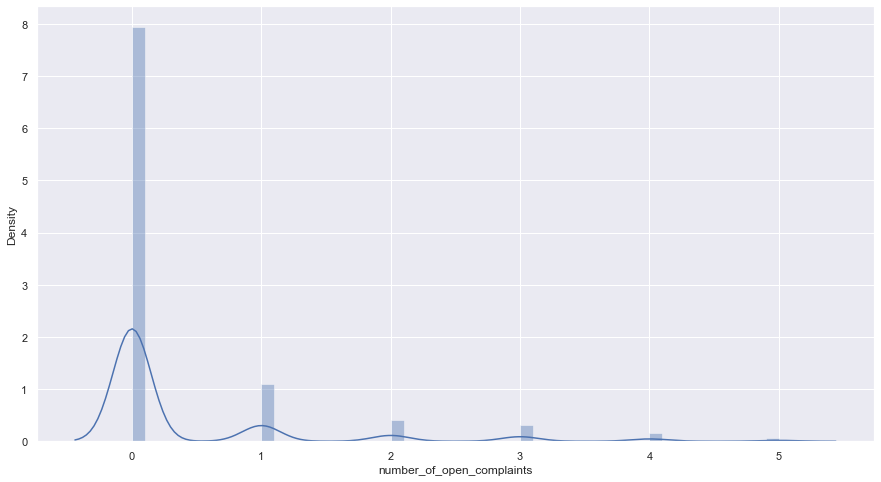

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


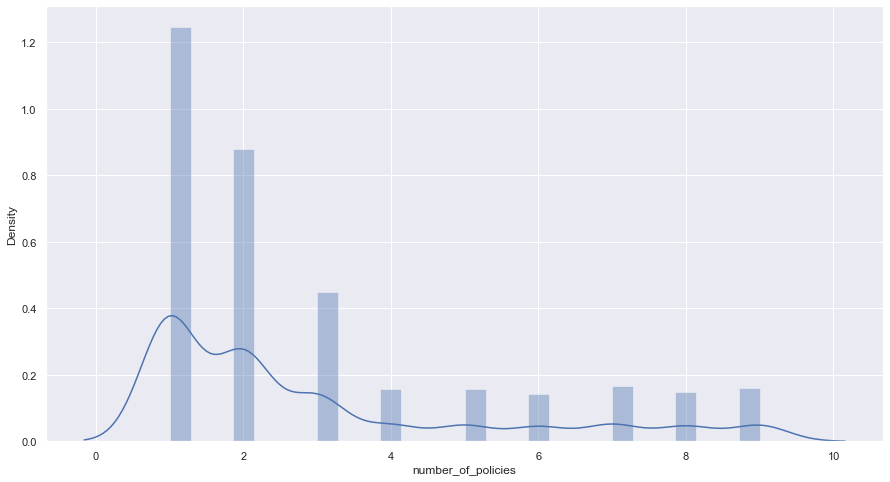

C:\Users\jasmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


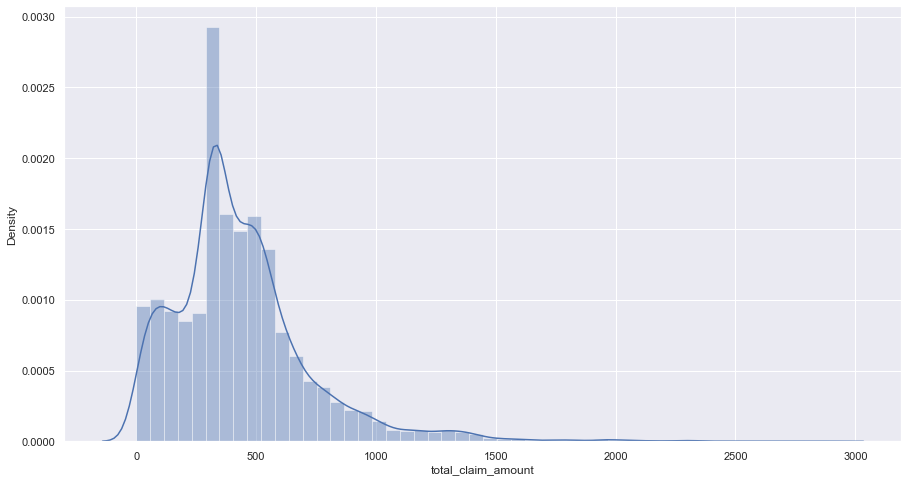

In [444]:
for column in numericals:
    sns.distplot(numericals[column])
    plt.show()